## Problem statement: Car Price Prediction

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn 
sn.set(color_codes=True)
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('car details v3.csv')

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
#checking null value
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
# summary of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# head
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
# removing unnecessary character
df['mileage'] = df['mileage'].str.replace('kmpl|km/kg', '')
df['engine'] = df['engine'].str.replace('CC', '')

<ipython-input-7-bfccb40ad18b>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['mileage'] = df['mileage'].str.replace('kmpl|km/kg', '')


In [8]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
#renaming columns
df = df.rename(columns={'mileage': 'mileage(kmpl)', 'engine': 'engine(CC)'})

In [10]:
#dropping unwanted columns
df.drop(['name','torque','max_power'],axis=1,inplace=True)

In [11]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,5.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage(kmpl)  7907 non-null   object 
 8   engine(CC)     7907 non-null   object 
 9   seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 635.1+ KB


In [13]:
#changing the Dtype object to float
df["mileage(kmpl)"] = df["mileage(kmpl)"].astype(str).astype(float)
df["engine(CC)"] = df["engine(CC)"].astype(str).astype(float)

In [14]:
#fillna with mean value
df['mileage(kmpl)'] = df['mileage(kmpl)'].fillna((df['mileage(kmpl)'].mean()))
df["engine(CC)"] = df["engine(CC)"].fillna((df['mileage(kmpl)'].mean()))
df["seats"] = df["seats"].fillna((df['seats'].median()))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8128 non-null   int64  
 1   selling_price  8128 non-null   int64  
 2   km_driven      8128 non-null   int64  
 3   fuel           8128 non-null   object 
 4   seller_type    8128 non-null   object 
 5   transmission   8128 non-null   object 
 6   owner          8128 non-null   object 
 7   mileage(kmpl)  8128 non-null   float64
 8   engine(CC)     8128 non-null   float64
 9   seats          8128 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 635.1+ KB


In [16]:
# checking null values
df.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage(kmpl)    0
engine(CC)       0
seats            0
dtype: int64

## Data Visualization

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage(kmpl)'>

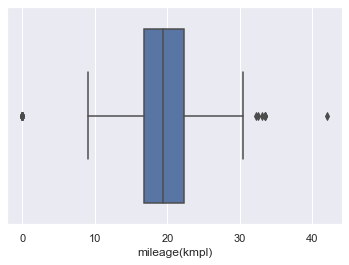

In [17]:
sn.boxplot(df['mileage(kmpl)'])

In [18]:
##finding outliers
df[df['mileage(kmpl)']>30]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),seats
35,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,4.0
170,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.00,1969.0,4.0
866,2012,165000,60000,CNG,Individual,Manual,Second Owner,30.46,796.0,5.0
2312,2013,270000,80000,CNG,Individual,Manual,Second Owner,32.52,998.0,5.0
3908,2017,260000,67000,CNG,Individual,Manual,First Owner,33.44,796.0,4.0
4004,2013,178000,70000,CNG,Individual,Manual,Second Owner,30.46,796.0,5.0
5789,2019,430000,20000,CNG,Individual,Manual,First Owner,32.26,998.0,4.0
5815,2020,370000,16000,CNG,Individual,Manual,First Owner,33.00,796.0,5.0
7543,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,4.0


c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km_driven'>

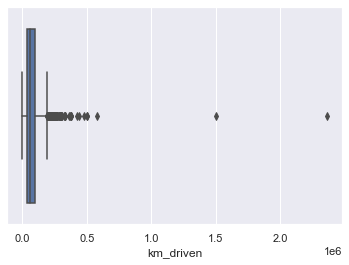

In [19]:
sn.boxplot(df['km_driven'])

In [20]:
#removing outliers
Q1 = df['mileage(kmpl)'].quantile(0.25)
Q3 = df['mileage(kmpl)'].quantile(0.75)
IQR=Q3-Q1
Lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR
Lower_bound,upper_bound

df = df[(df['mileage(kmpl)']>Lower_bound)&(df['mileage(kmpl)'] < upper_bound)]

In [21]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,5.0


c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage(kmpl)'>

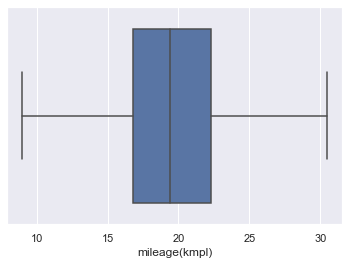

In [22]:
sn.boxplot(df['mileage(kmpl)'])

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fuel', ylabel='count'>

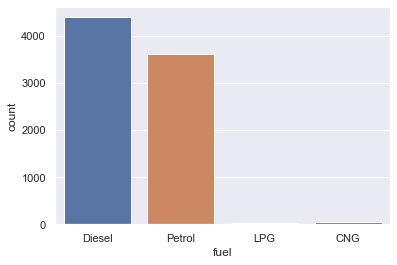

In [23]:
sn.countplot(df['fuel'])

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seller_type', ylabel='count'>

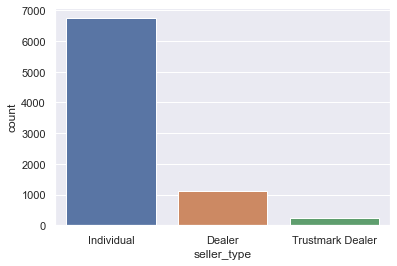

In [24]:
sn.countplot(df['seller_type'])

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='seats', ylabel='count'>

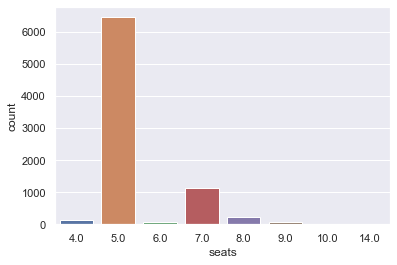

In [25]:
sn.countplot(df['seats'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8104 entries, 0 to 8127
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8104 non-null   int64  
 1   selling_price  8104 non-null   int64  
 2   km_driven      8104 non-null   int64  
 3   fuel           8104 non-null   object 
 4   seller_type    8104 non-null   object 
 5   transmission   8104 non-null   object 
 6   owner          8104 non-null   object 
 7   mileage(kmpl)  8104 non-null   float64
 8   engine(CC)     8104 non-null   float64
 9   seats          8104 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 954.5+ KB


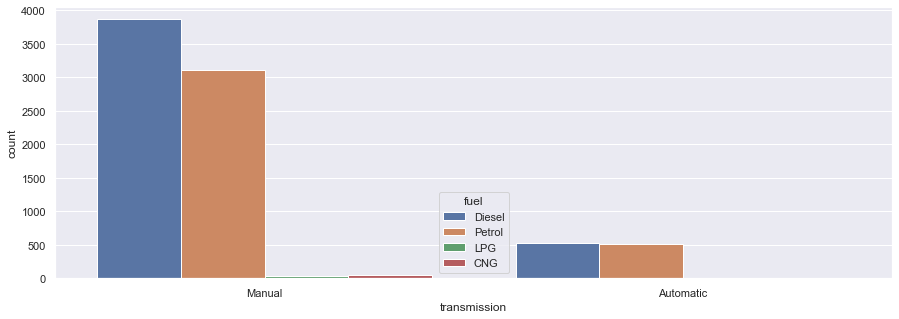

In [27]:

plt.figure(figsize=(15,5))

sn.countplot(x="transmission",hue="fuel",data=df)
plt.show()

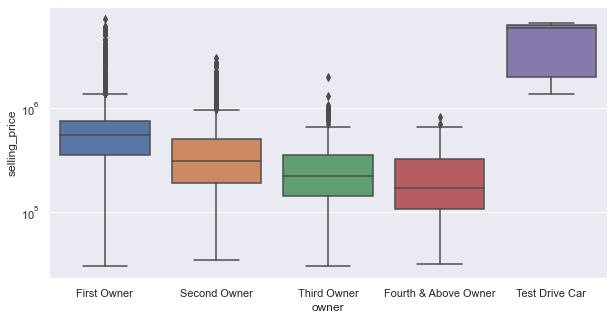

In [28]:
plt.figure(figsize=(10,5))
sn.boxplot(x='owner',y='selling_price', data=df)
plt.yscale('log')
plt.show()

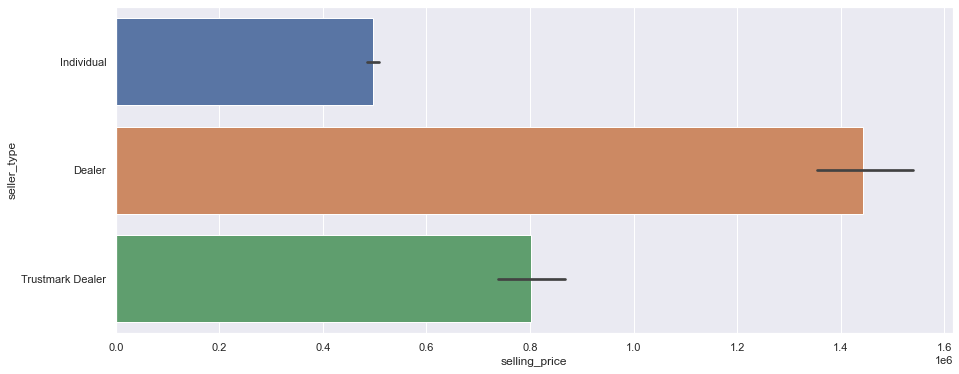

In [29]:
plt.figure(figsize=(15,6))
sn.barplot(x='selling_price',y='seller_type', data=df)
plt.show()


<Figure size 1080x360 with 0 Axes>

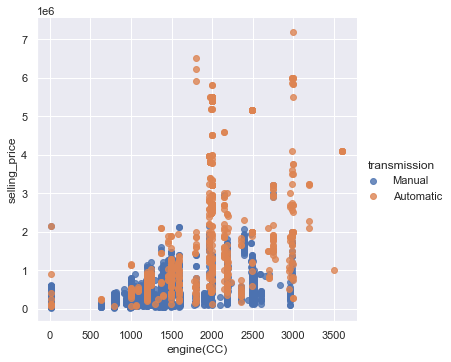

In [30]:
plt.figure(figsize=(15,5))
sn.lmplot(x='engine(CC)',y='selling_price',hue='transmission', data=df,fit_reg=False)
plt.show()

-From the visualization,transmission(manual) in fuel(diesel) is more as compared to others.

-5 seaters cars are more in count.

-Selling price of first owner is high, and more in dealer type.


In [31]:
df.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3}},inplace=True)
df.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
df.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
df.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)


c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [32]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),seats
0,2014,450000,145500,0,0,0,0,23.40,1248.0,5.0
1,2014,370000,120000,0,0,0,1,21.14,1498.0,5.0
2,2006,158000,140000,1,0,0,2,17.70,1497.0,5.0
3,2010,225000,127000,0,0,0,0,23.00,1396.0,5.0
4,2007,130000,120000,1,0,0,0,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,0,0,0,18.50,1197.0,5.0
8124,2007,135000,119000,0,0,0,3,16.80,1493.0,5.0
8125,2009,382000,120000,0,0,0,0,19.30,1248.0,5.0
8126,2013,290000,25000,0,0,0,0,23.57,1396.0,5.0


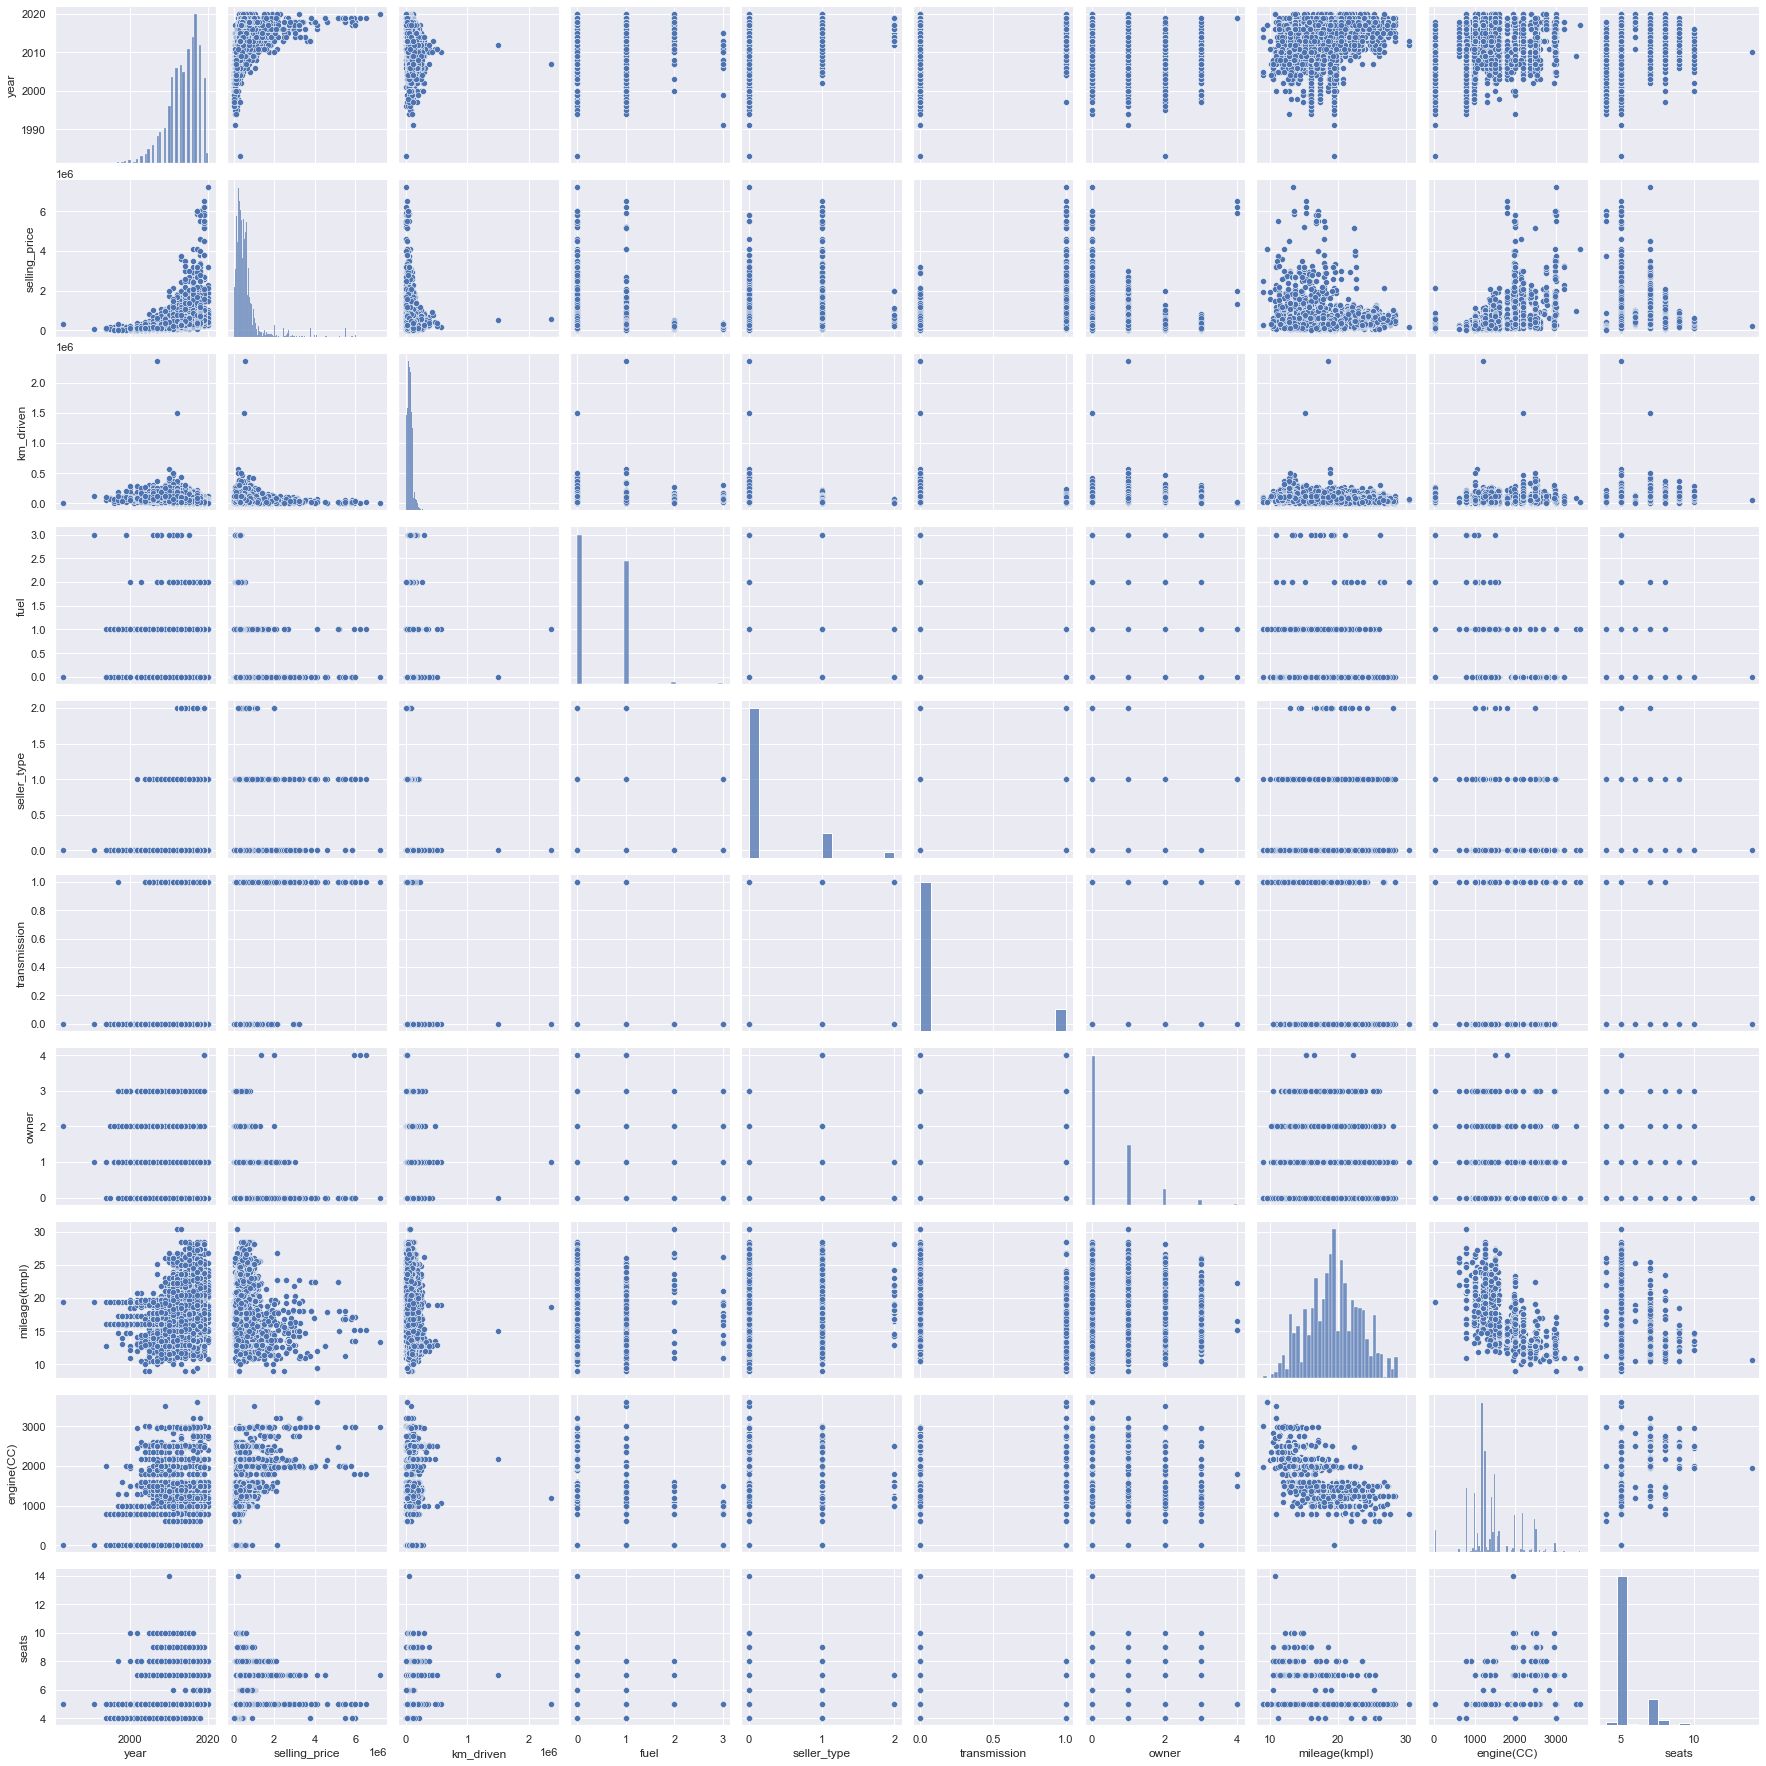

In [33]:
sn.pairplot(df)

### Checking multicollinearity

In [34]:
df.corr()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),seats
year,1.000000,0.417060,-0.417779,-0.064625,0.235132,0.245790,-0.505484,0.313590,0.128628,0.012066
selling_price,0.417060,1.000000,-0.227189,-0.207371,0.325887,0.589972,-0.223564,-0.137251,0.448236,0.049682
km_driven,-0.417779,-0.227189,1.000000,-0.239745,-0.195151,-0.201906,0.283127,-0.175970,0.156014,0.219372
fuel,-0.064625,-0.207371,-0.239745,1.000000,0.036307,0.013294,-0.000087,-0.050365,-0.451064,-0.335888
seller_type,0.235132,0.325887,-0.195151,0.036307,1.000000,0.354879,-0.199796,-0.020894,0.125009,-0.072860
transmission,0.245790,0.589972,-0.201906,0.013294,0.354879,1.000000,-0.142362,-0.178004,0.272050,-0.068998
owner,-0.505484,-0.223564,0.283127,-0.000087,-0.199796,-0.142362,1.000000,-0.172875,-0.046895,0.017693
mileage(kmpl),0.313590,-0.137251,-0.175970,-0.050365,-0.020894,-0.178004,-0.172875,1.000000,-0.533623,-0.471258
engine(CC),0.128628,0.448236,0.156014,-0.451064,0.125009,0.272050,-0.046895,-0.533623,1.000000,0.585164
seats,0.012066,0.049682,0.219372,-0.335888,-0.072860,-0.068998,0.017693,-0.471258,0.585164,1.000000


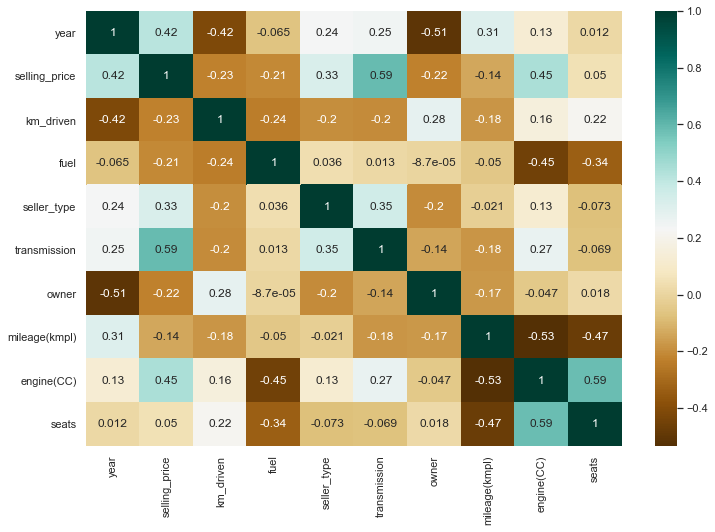

In [35]:
# plotting correlations on a heatmap
plt.figure(figsize=(12,8))
sn.heatmap(df.corr(),cmap='BrBG',annot=True)
plt.show()


### Normalizing the data

In [36]:
def normalize(x):
    return ( (x-np.min(x))/(max(x)-min(x)))

                                              
# applying normalize ( ) to all columns using apply function 
df= df.apply(normalize)

In [37]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),seats
0,0.837838,0.058578,0.061640,0.000000,0.0,0.0,0.00,0.671016,0.342741,0.1
1,0.837838,0.047420,0.050837,0.000000,0.0,0.0,0.25,0.565704,0.412484,0.1
2,0.621622,0.017852,0.059310,0.333333,0.0,0.0,0.50,0.405405,0.412205,0.1
3,0.729730,0.027197,0.053803,0.000000,0.0,0.0,0.00,0.652377,0.384028,0.1
4,0.648649,0.013947,0.050837,0.333333,0.0,0.0,0.00,0.330848,0.356689,0.1
...,...,...,...,...,...,...,...,...,...,...
8123,0.810811,0.040446,0.046601,0.333333,0.0,0.0,0.00,0.442684,0.328513,0.1
8124,0.648649,0.014644,0.050414,0.000000,0.0,0.0,0.75,0.363467,0.411089,0.1
8125,0.702703,0.049094,0.050837,0.000000,0.0,0.0,0.00,0.479963,0.342741,0.1
8126,0.810811,0.036262,0.010591,0.000000,0.0,0.0,0.00,0.678938,0.384028,0.1


### Splitting the data and Target

In [38]:
X= df.drop(['selling_price'],axis=1)

In [39]:
y= df['selling_price']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100
)

### LinearRegression

In [42]:
from sklearn import linear_model

In [43]:
lm= linear_model.LinearRegression()

In [44]:
lm.fit(X_train,y_train)

LinearRegression()

In [45]:
training_data_prediction = lm.predict(X_train)

In [46]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.545468402218956


### So, lower values of RMSE indicate better fit of data.

### Visualize the actual prices and Predicted prices

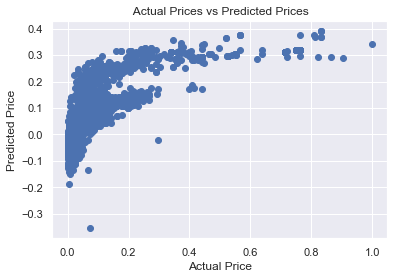

In [47]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [48]:
test_data_prediction = lm.predict(X_test)

In [49]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.528132075744026


### Visualize the actual prices and Predicted prices

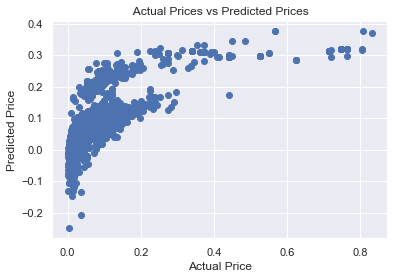

In [50]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### Lasso

In [51]:
lass_reg_model = Lasso()

In [52]:
lass_reg_model.fit(X_train,y_train)

Lasso()

In [53]:
training_data_prediction = lass_reg_model.predict(X_train)

In [54]:
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.0


### Visualize the actual prices and Predicted prices

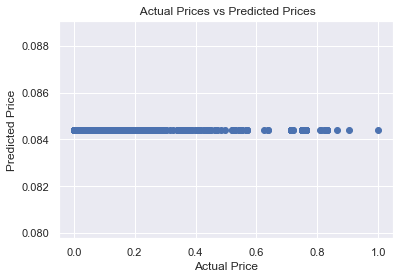

In [55]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

As,we can see that R squared Error is very low, the lower the value the better and 0 means the model is perfect.

In [56]:
test_data_prediction = lass_reg_model.predict(X_test)

In [57]:
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  -6.465511603148677e-05


### Visualize the actual prices and Predicted prices

### Building a linear model

In [58]:
import statsmodels.api as sm
# Adding a constant column to our X_train dataframe
X_train=sm.add_constant(X_train)
# create a first fitted model
lm_1= sm.OLS(y_train,X_train).fit()

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [59]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     755.0
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:08:04   Log-Likelihood:                 6574.9
No. Observations:                5672   AIC:                        -1.313e+04
Df Residuals:                    5662   BIC:                        -1.306e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1712      0.011    -15.218

### Checking VIF

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def vif_scores(input_data):
    vif=pd.DataFrame()
    vif['variables']=input_data.columns
    vif["VIF"]= [variance_inflation_factor(input_data.values,i) for i in range(input_data.shape[1])]
    return vif.sort_values(by='VIF',ascending= False)

# print vif scores for all current input features
vif_scores(X)

,variables,VIF
0,year,60.635474
7,engine(CC),19.389645
6,mileage(kmpl),19.281687
8,seats,6.102651
1,km_driven,3.013741
2,fuel,2.476958
4,transmission,1.612026
5,owner,1.577881
3,seller_type,1.418973


In [61]:
vif_scores(X.drop('year',1))

<ipython-input-61-462b5606e847>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  vif_scores(X.drop('year',1))


,variables,VIF
6,engine(CC),10.330897
7,seats,5.556701
5,mileage(kmpl),3.730119
0,km_driven,2.992767
1,fuel,1.640934
3,transmission,1.570911
4,owner,1.560601
2,seller_type,1.414111


In [62]:
vif_scores(X.drop(['year','engine(CC)'],1))

<ipython-input-62-8cc2c01e2382>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  vif_scores(X.drop(['year','engine(CC)'],1))


,variables,VIF
5,mileage(kmpl),2.980914
0,km_driven,2.813424
6,seats,2.499328
1,fuel,1.639081
4,owner,1.551033
2,seller_type,1.380492
3,transmission,1.294421


In [63]:
df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(kmpl)', 'engine(CC)', 'seats'],
      dtype='object')

### Dropping the Variable and Updating the Model

In [64]:
X=df[[ 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(kmpl)', 'seats']]

# Putting response variable to y ie. price
y = df['selling_price']

In [65]:
from sklearn.model_selection import train_test_split

# test and train split with train_size as 30% and random state as 100
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=100
)

### Making Predictions by rebuilding Model

In [66]:
X_train =  sm.add_constant(X_train)


# Adding  constant variable to test dataframe
X_test = sm.add_constant(X_test)

# create a second fitted model
lm_2 = sm.OLS(y_train,X_train).fit() 

c:\users\pulkit\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [67]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     672.1
Date:                Tue, 30 Nov 2021   Prob (F-statistic):               0.00
Time:                        00:08:05   Log-Likelihood:                 6053.6
No. Observations:                5672   AIC:                        -1.209e+04
Df Residuals:                    5664   BIC:                        -1.204e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1349      0.006     20.921

#### So, the F-statistics have higher value and p_value less than 0.05 signifies that there is a good amount of relationship between the target variable and the feature variables. 

In [68]:
y_prediction = lm_2.predict(X_test)

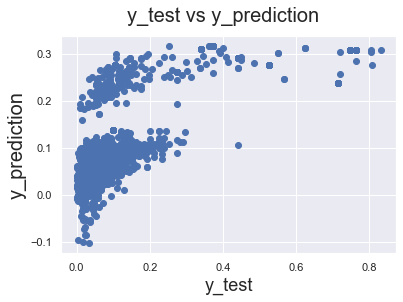

In [69]:
fig = plt.figure()
plt.scatter(y_test,y_prediction)                          #plotting scatter plot between actual and predicted
plt.suptitle("y_test vs y_prediction",fontsize=20)            # Plot heading 
plt.xlabel('y_test',fontsize=18)                             # X-label
plt.ylabel('y_prediction',fontsize=20)                       # Y-label
#show plot
plt.show()